# 2. Read table and analysis

1. Read table and processing


In [200]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pa
import zipfile
import os
import matplotlib.pyplot as plt


## read data

In [159]:
path= "D:/DATA_Analayses/Project/TennisGame/data/processed"
dris = os.listdir(path)
name_of_folder = pd.Series(dris)




In [181]:
GameInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/GameInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayScoreInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchAwayScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayTeamInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchAwayTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchEventInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchEventInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeScoreInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchHomeScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeTeamInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchHomeTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchRoundInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchRoundInfo.csv").drop(columns=["Unnamed: 0"])
MatchSeasonInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchSeasonInfo.csv").drop(columns=["Unnamed: 0"])
MatchTimeInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"])
MatchTournamentInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTournamentInfo.csv").drop(columns=["Unnamed: 0"])
MatchVenueInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchVenueInfo.csv").drop(columns=["Unnamed: 0"])
MatchVotesInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchVotesInfo.csv").drop(columns=["Unnamed: 0"])
OddsInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/OddsInfo.csv").drop(columns=["Unnamed: 0"])
PeriodInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/PeriodInfo.csv").drop(columns=["Unnamed: 0"])
PowerInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/PowerInfo.csv").drop(columns=["Unnamed: 0"])


### 1.	How many tennis players are included in the dataset?

In [164]:
MatchHomeTeamInfo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       14090 non-null  int64  
 1   name           14090 non-null  object 
 2   slug           14090 non-null  object 
 3   gender         14061 non-null  object 
 4   user_count     14090 non-null  int64  
 5   residence      3764 non-null   object 
 6   birthplace     7806 non-null   object 
 7   height         7585 non-null   float64
 8   weight         3610 non-null   float64
 9   plays          6737 non-null   object 
 10  turned_pro     2668 non-null   float64
 11  current_prize  13984 non-null  float64
 12  total_prize    14047 non-null  float64
 13  player_id      14090 non-null  int64  
 14  current_rank   13933 non-null  float64
 15  name_code      14090 non-null  object 
 16  country        14090 non-null  object 
 17  full_name      14090 non-null  object 
dtypes: flo

1st way: Find player with player_id

In [249]:
player_id = pd.concat([MatchAwayTeamInfo["player_id"], MatchHomeTeamInfo["player_id"]])
# player_id.unique().size
print(f"Avrage high players is  {player_id.unique().size}")

Avrage high players is  2352


2nd way: Find player with full_name

In [250]:
player_full_name = pd.concat([MatchAwayTeamInfo["full_name"], MatchHomeTeamInfo["full_name"]])
player_full_name.unique().size

print(f"Avrage high players is  {player_full_name.unique().size}")

Avrage high players is  2353


### 2.	What is the average height of the players?

In [167]:
MatchAwayTeamInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12955 entries, 0 to 12954
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       12955 non-null  int64  
 1   name           12955 non-null  object 
 2   slug           12955 non-null  object 
 3   gender         12933 non-null  object 
 4   user_count     12955 non-null  int64  
 5   residence      3601 non-null   object 
 6   birthplace     7235 non-null   object 
 7   height         7008 non-null   float64
 8   weight         3496 non-null   float64
 9   plays          6432 non-null   object 
 10  turned_pro     2586 non-null   float64
 11  current_prize  12808 non-null  float64
 12  total_prize    12900 non-null  float64
 13  player_id      12955 non-null  int64  
 14  current_rank   12733 non-null  float64
 15  name_code      12955 non-null  object 
 16  country        12954 non-null  object 
 17  full_name      12955 non-null  object 
dtypes: flo

In [182]:
player_info = pd.concat([MatchAwayTeamInfo[["player_id", "height"]]
                        , MatchHomeTeamInfo[["player_id", "height"]]])

player_info[player_info.duplicated()].sort_values("player_id")
#----------------------------------

player_id = player_info["player_id"].unique()
player_id_nan_notna=[]
for i in range(player_id.size):
    nullcount = player_info[player_info["player_id"]==player_id[i]]["height"].isna().sum()
    nanullcount = player_info[player_info["player_id"]==player_id[i]]["height"].notna().sum()
    if nullcount != 0:
        if nanullcount !=0:
            player_id_nan_notna.append(i)
            print(i)
player_id_nan_notna = pd.Series(player_id_nan_notna)

print(player_id_nan_notna)

36
217
878
1452
1684
1985
2321
0      36
1     217
2     878
3    1452
4    1684
5    1985
6    2321
dtype: int64


In [183]:
for i in player_id_nan_notna:
    player_info[player_info["player_id"]==player_id[i]] = (player_info[player_info["player_id"]==player_id[i]]
                                                           .sort_values("height").ffill())


discribe information of hight pleyers

In [201]:
player_info_cleaned = player_info.drop_duplicates(subset=["player_id"])
player_info_cleaned["height"].describe()



count    1202.000000
mean        1.820042
std         0.080405
min         1.570000
25%         1.780000
50%         1.830000
75%         1.880000
max         2.080000
Name: height, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

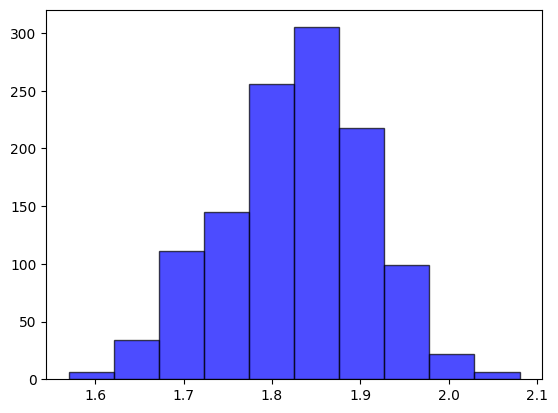

In [261]:
plt.hist(player_info_cleaned["height"], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.show

In [239]:
player_info_cleaned_mode = float(player_info_cleaned["height"].mode().iloc[0])
avrage_high_player = (player_info_cleaned
                        .fillna(value = player_info_cleaned_mode)["height"]
                        .mean().round(4))

print(f"avrage high players is  {avrage_high_player}")

avrage high players is  1.8249


### 3.	Which player has the highest number of wins?

In [302]:
GameInfo[(GameInfo["match_id"]==12301140) & (GameInfo["set_id"]==1)]


,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
114,12301140,1,12,0,15,0,0,1,5,5,7,1,2
115,12301140,1,12,1,15,15,0,5,1,5,7,1,2
116,12301140,1,12,2,15,30,0,5,1,5,7,1,2
117,12301140,1,12,3,15,40,0,5,3,5,7,1,2
118,12301140,1,11,0,0,15,0,5,1,5,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95324,12301140,1,2,7,40,40,2,5,1,2,0,1,1
95325,12301140,1,2,8,A,40,0,1,5,2,0,1,1
95326,12301140,1,1,0,15,0,0,1,5,1,0,2,1
95327,12301140,1,1,1,30,0,2,1,5,1,0,2,1


In [310]:
home_merge = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=("","home"))
home_merge

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only,...,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12276860,1.0,3,A,hQVbsOCic,1.0,3,1714744500,navone-nava,False,...,NaN,NaN,NaN,334457.0,507656.0,271389,31.0,NAV,Argentina,"Navone, Mariano"
1,12276860,1.0,3,A,hQVbsOCic,1.0,3,1714744500,navone-nava,False,...,NaN,NaN,NaN,334457.0,507656.0,271389,31.0,NAV,Argentina,"Navone, Mariano"
2,12296111,1.0,NaN,NaN,GtGfhfBc,1.0,3,1714662000,torres-murcia-lodikova,True,...,NaN,NaN,NaN,5030.0,87286.0,78431,361.0,LOD,Russia,"Lodikova, Daria"
3,12296111,1.0,NaN,NaN,GtGfhfBc,1.0,3,1714662000,torres-murcia-lodikova,True,...,NaN,NaN,NaN,5030.0,87286.0,78431,361.0,LOD,Russia,"Lodikova, Daria"
4,12302789,NaN,NaN,NaN,ILUbsHRbc,1.0,3,1714749300,riera-romero-gormaz,False,...,NaN,NaN,NaN,86952.0,229457.0,254282,94.0,RIE,Argentina,"Riera, Julia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201,12327573,NaN,NaN,NaN,FadcsFVhe,1.0,3,1715660100,hata-ozeki,False,...,NaN,NaN,NaN,184.0,2288.0,257530,1343.0,OZE,Japan,"Ozeki, Ayaka"
31202,12331158,1.0,NaN,NaN,eMUbmkoHd,1.0,3,1715672400,plunger-di-natale,False,...,NaN,NaN,NaN,997.0,9001.0,236854,955.0,DI,Italy,"Di Natale, Gian Matias"
31203,12331158,1.0,NaN,NaN,eMUbmkoHd,1.0,3,1715672400,plunger-di-natale,False,...,NaN,NaN,NaN,997.0,9001.0,236854,952.0,DI,Italy,"Di Natale, Gian Matias"
31204,12330452,2.0,NaN,NaN,DQxbsgLPb,2.0,3,1715658300,bax-bass,True,...,80.0,right-handed,NaN,1315.0,20397.0,182086,1150.0,BAS,United Kingdom,"Bass, Finn"


In [312]:
home_merge = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=["home"])
away_marge = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=["away"])

# Create a DataFrame for home wins and away wins
home_wins = home_merge[home_merge['winner_code'] == 1][['player_id', 'name']].copy()
away_wins = away_marge[away_marge['winner_code'] != 1][['player_id', 'name']].copy()

# Combine home wins and away wins
all_wins = pd.concat([home_wins, away_wins])

# Calculate the number of wins for each player
win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

# Merge with player names
player_names = all_wins[['player_id', 'name']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

# Find the player with the highest number of wins
top_player = win_counts.loc[win_counts['wins'].idxmax()]

# Display the result
print("Player with the highest number of wins:")
print(top_player)

Player with the highest number of wins:
player_id         342975
wins                  76
name         Poljičak M.
Name: 0, dtype: object
